In [1]:
import numpy as np

import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [2]:
model = tf.keras.saving.load_model('trained_model.keras')


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

## visualize image of test set

In [ ]:
import cv2


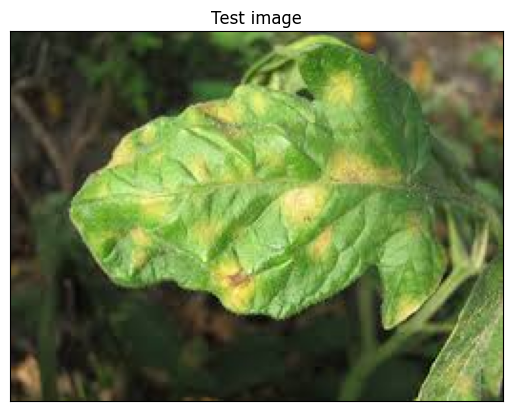

In [26]:
image_path = 'mold.jpeg'

img = cv2.imread(image_path)

img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title('Test image')
plt.xticks([])
plt.yticks([])
plt.show()

Testing model

In [27]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) 
print(input_arr)

[[[[ 30.  38.  27.]
   [ 35.  43.  32.]
   [ 32.  38.  28.]
   ...
   [ 95.  60.  38.]
   [ 95.  63.  38.]
   [ 83.  68.  37.]]

  [[ 34.  42.  31.]
   [ 37.  45.  34.]
   [ 35.  41.  31.]
   ...
   [120.  90.  66.]
   [129.  99.  71.]
   [121.  94.  64.]]

  [[ 36.  44.  33.]
   [ 36.  44.  33.]
   [ 35.  41.  31.]
   ...
   [130. 104.  77.]
   [142. 115.  85.]
   [138. 105.  74.]]

  ...

  [[ 46.  42.  31.]
   [ 38.  34.  23.]
   [ 34.  31.  16.]
   ...
   [110. 124.  63.]
   [137. 151. 100.]
   [ 61.  65.  48.]]

  [[ 58.  52.  38.]
   [ 49.  43.  29.]
   [ 43.  40.  23.]
   ...
   [ 88. 105.  53.]
   [107. 124.  79.]
   [ 44.  51.  33.]]

  [[ 74.  66.  45.]
   [ 60.  52.  31.]
   [ 54.  46.  23.]
   ...
   [ 54.  78.  44.]
   [ 69.  93.  61.]
   [ 53.  66.  48.]]]]


In [28]:
print(input_arr.shape)

(1, 128, 128, 3)


In [29]:
predictions =  model.predict(input_arr)
predictions

1/1 [==============================] - 0s 382ms/step


array([[1.8655751e-06, 2.5234647e-07, 1.6815648e-08, 4.0917530e-10,
        1.3803880e-10, 4.1997372e-03, 1.9066105e-05, 1.3104787e-02,
        7.6443439e-06, 7.1682230e-06, 1.1045090e-07, 1.4282990e-08,
        9.8265898e-01, 1.0950182e-09, 3.8642327e-07]], dtype=float32)

In [30]:
result_index = np.argmax(predictions)
result_index

12

In [31]:
class_name =['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

##display result

In [32]:
model_prediction = class_name[result_index]

In [33]:
model_prediction

'Tomato__Tomato_YellowLeaf__Curl_Virus'